In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats

In [2]:
fontsize = plt.rcParams['font.size']

In [31]:
output_dir = Path('/Users/alex/Documents/Work/UWyo/Research/Flux Pipeline Project/Eddypro-ec-testing/eddypro/output')
full_output_files = output_dir.glob('*_full_output_*.csv')
biomet_files = output_dir.glob('*_biomet_*.csv')

full_outputs = []
for f in full_output_files:
    idata = pd.read_csv(
        f,
        skiprows=[0, 2],
        parse_dates=[['date', 'time']],
        na_values=-9999
    )
    idata['date_time'] -= pd.Timedelta('6H')
    # print(f.parent.name)
    idata['fn'] = f.name
    idata['run_id'] = 'test'
    full_outputs.append(idata)
    


biomet_outputs = []
for f in biomet_files:
    idata = pd.read_csv(
        f,
        skiprows=[1],
        parse_dates=[['date', 'time']],
        na_values=-9999
    )
    idata['date_time'] -= pd.Timedelta('6H')
    idata = idata.drop(columns='DOY')
    idata['fn'] = f.name
    idata['run_id'] = 'test'
    biomet_outputs.append(idata)


full_output = pd.concat(full_outputs)
biomet = pd.concat(biomet_outputs)

output_df = (
    full_output
    .merge(biomet, on=['date_time'])
    .set_index(['date_time']).sort_values('date_time')
)
output_xr = xr.Dataset.from_dataframe(output_df)
output_xr['ch4_flux'] /= 1e6

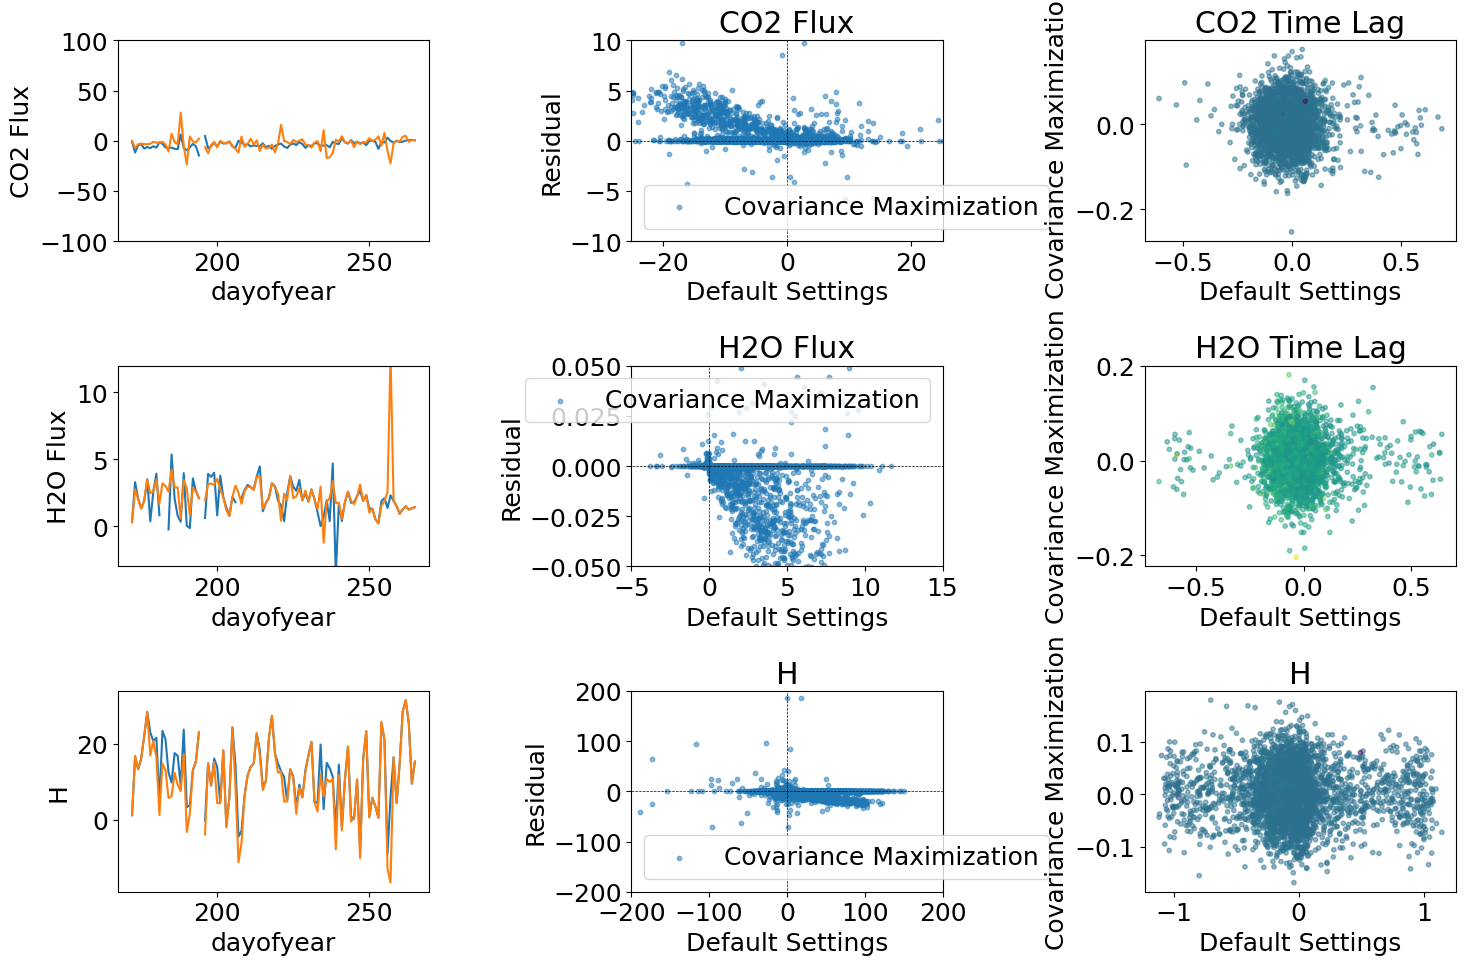

In [24]:
covmax = output_xr.sel(run_id='Cov Max')
covmax = output_xr.sel(run_id='No Time Lag Correction')
template = output_xr.sel(run_id='Control')
notilt = output_xr.sel(run_id='No Tilt Correction')

fig = plt.figure(figsize=(15, 10))

fig.add_subplot(332)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(template['co2_flux'], (covmax['co2_flux'] - template['co2_flux']),  label='Covariance Maximization', alpha=0.5, s=10)
# plt.plot([-2000, 1000], [-2000, 1000], '--k', lw=0.5)
plt.hlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.vlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.xlim(-25, 25)
plt.ylim(-10, 10)
plt.xlabel('Default Settings')
plt.ylabel('Residual')
plt.title('CO2 Flux')
plt.legend()

fig.add_subplot(335)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(template['h2o_flux'], (covmax['h2o_flux'] - template['h2o_flux']),  label='Covariance Maximization', alpha=0.5, s=10)
# plt.plot([-2000, 1000], [-2000, 1000], '--k', lw=0.5)
plt.hlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.vlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.xlim(-5, 15)
plt.ylim(-0.05, 0.05)
plt.xlabel('Default Settings')
plt.ylabel('Residual')
plt.title('H2O Flux')
plt.legend()

fig.add_subplot(338)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(template['H'], (covmax['H'] - template['H']),  label='Covariance Maximization', alpha=0.5, s=10)
# plt.plot([-2000, 1000], [-2000, 1000], '--k', lw=0.5)
plt.hlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.vlines(0, -300, 300, color='k', linestyle='--', lw=0.5)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.xlabel('Default Settings')
plt.ylabel('Residual')
plt.title('H')
plt.legend()

fig.add_subplot(333)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(stats.norm.rvs(template['co2_time_lag'], scale=0.05) , stats.norm.rvs(covmax['co2_time_lag'], scale=0.05),  label='Covariance Maximization', alpha=0.5, s=10, c=covmax['co2_flux'])
plt.xlabel('Default Settings')
plt.ylabel('Covariance Maximization')
plt.title('CO2 Time Lag')

fig.add_subplot(336)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(stats.norm.rvs(template['h2o_time_lag'], scale=0.05) , stats.norm.rvs(covmax['h2o_time_lag'], scale=0.05),  label='Covariance Maximization', alpha=0.5, s=10, c=covmax['h2o_flux'])
plt.xlabel('Default Settings')
plt.ylabel('Covariance Maximization')
plt.title('H2O Time Lag')

fig.add_subplot(339)
# plt.scatter(template['H'], notilt['H'] - template['H'], label='No Tilt Correction', alpha=0.5, s=10)
plt.scatter(stats.norm.rvs(template['ch4_time_lag'], scale=0.05) , stats.norm.rvs(covmax['ch4_time_lag'], scale=0.05),  label='Covariance Maximization', alpha=0.5, s=10, c=covmax['ch4_flux'])
plt.xlabel('Default Settings')
plt.ylabel('Covariance Maximization')
plt.title('H')

fig.add_subplot(331)
template['co2_flux'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
covmax['co2_flux'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
plt.ylabel('CO2 Flux')
plt.title('')
plt.ylim(-100, 100)

fig.add_subplot(334)
template['h2o_flux'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
covmax['h2o_flux'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
plt.ylabel('H2O Flux')
plt.title('')
plt.ylim(-3, 12)

fig.add_subplot(337)
template['H'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
covmax['H'].groupby(template.date_time.dt.dayofyear).mean().plot.line()
plt.ylabel('H')
plt.title('')
# plt.ylim(-1, 10)

plt.tight_layout(h_pad=1.2)

In [25]:
output_xr.run_id

<xarray.DataArray 'run_id' (run_id: 10)>
array(['Control', 'Cov Max', 'Cov Max Auto Opt', 'No Tilt Correction',
       'No Time Lag Correction', 'Planar Fit', 'Planar Fit No Velocity Bias',
       'Planar Fit Single-Sector', 'Triple Rotation',
       '_No Time Lag Correction'], dtype=object)
Coordinates:
  * run_id   (run_id) object 'Control' 'Cov Max' ... '_No Time Lag Correction'

In [27]:
# output_xr.loc[dict(run_id='no-time-lag')]['ch4_flux'] = output_xr.loc[dict(run_id='no-time-lag')]['ch4_flux']*1e11

In [28]:
output_xr

<xarray.Dataset>
Dimensions:                  (date_time: 4511, run_id: 10)
Coordinates:
  * date_time                (date_time) datetime64[ns] 2020-06-20T18:30:00 ....
  * run_id                   (run_id) object 'Control' ... '_No Time Lag Corr...
Data variables: (12/133)
    filename                 (date_time, run_id) object 'LostCreek_ts_data_20...
    DOY                      (date_time, run_id) float64 173.0 173.0 ... nan nan
    daytime                  (date_time, run_id) float64 0.0 0.0 0.0 ... nan nan
    file_records             (date_time, run_id) float64 1.8e+04 1.8e+04 ... nan
    used_records             (date_time, run_id) float64 1.8e+04 1.8e+04 ... nan
    Tau                      (date_time, run_id) float64 -0.065 -0.065 ... nan
    ...                       ...
    LWin_1_1_1               (date_time, run_id) float64 -11.9 -11.9 ... nan nan
    SWout_1_1_1              (date_time, run_id) float64 2.76 2.76 ... nan nan
    SWin_1_1_1               (date_time, run_id) float64 10.11 10.11 ... nan nan
    PPFD_1_1_1               (date_time, run_id) float64 26.83 26.83 ... nan nan
    Ts_1_1_1                 (date_time, run_id) float64 279.8 279.8 ... nan nan
    Pa_1_1_1                 (date_time, run_id) float64 4.551e+04 ... nan

/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slic

Text(0.5, 1.05, 'Dirunal Variation in CO2 Flux')

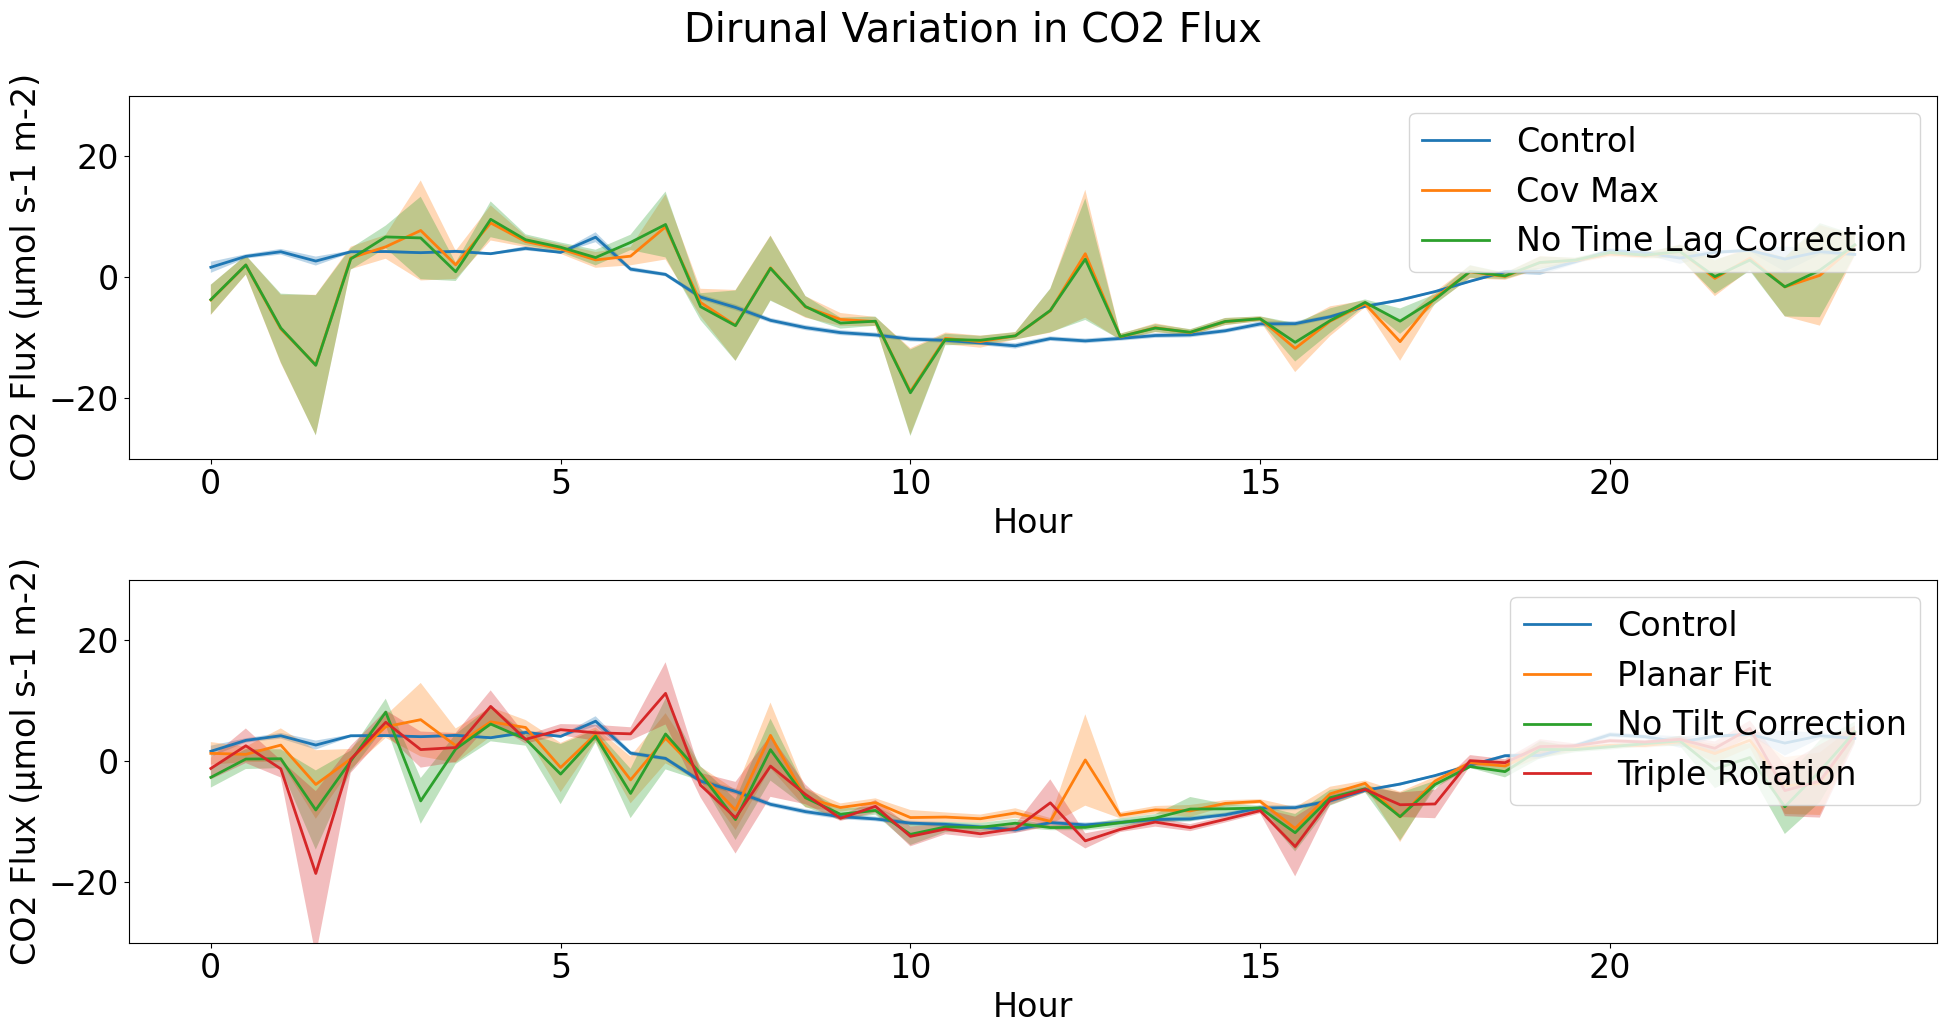

In [29]:
hh = output_xr.date_time.dt.hour + output_xr.date_time.dt.minute/60

def plot_diurnal(name, lims):
    plt.rcParams['font.size'] = 24
    np.seterr(all="ignore")
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    mean = output_xr.sel(dict(run_id=['Control', 'Cov Max', 'No Time Lag Correction'])).where(output_xr.qc_co2_flux != 2).groupby(hh).mean()[name]
    err = output_xr.sel(dict(run_id=['Control', 'Cov Max', 'No Time Lag Correction'])).where(output_xr.qc_co2_flux != 2).groupby(hh).std()[name]/np.sqrt(563)*1.96
    
    for run_id in mean.run_id:
        axs[0].plot(np.arange(0, 24, 0.5), mean.sel(run_id=run_id), label=run_id.values, lw=2)
        axs[0].fill_between(np.arange(0, 24, 0.5), (mean - err).sel(run_id=run_id),( mean + err).sel(run_id=run_id), alpha=0.3)
    axs[0].set_ylim(*lims)    
    axs[0].set_ylabel(name)
    axs[0].legend(loc='upper right')

    axs[0].set_xlabel('Hour')
    mean = output_xr.sel(dict(run_id=['Control', 'Planar Fit', 'No Tilt Correction', 'Triple Rotation'])).where(output_xr.qc_co2_flux != 2).groupby(hh).mean()[name]
    err = output_xr.sel(dict(run_id=['Control', 'Planar Fit', 'No Tilt Correction', 'Triple Rotation'])).where(output_xr.qc_co2_flux != 2).groupby(hh).std()[name]/np.sqrt(563)*1.96
    for run_id in mean.run_id:
        axs[1].plot(np.arange(0, 24, 0.5), mean.sel(run_id=run_id), label=run_id.values, lw=2)
        axs[1].fill_between(np.arange(0, 24, 0.5), (mean - err).sel(run_id=run_id),( mean + err).sel(run_id=run_id), alpha=0.3)
    axs[1].set_xlabel('Hour')
    axs[1].set_ylim(*lims)
    axs[1].set_ylabel(name)
    axs[1].legend(loc='upper right')
    plt.tight_layout(h_pad=1.2)

    return fig, axs

fig, axs = plot_diurnal('co2_flux', lims=(-30, 30))
for ax in axs:
    ax.set_ylabel('CO2 Flux (µmol s-1 m-2)')
fig.suptitle('Dirunal Variation in CO2 Flux', y=1.05)



/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slic

Text(0.5, 1.05, 'Dirunal Variation in CH4 Flux')

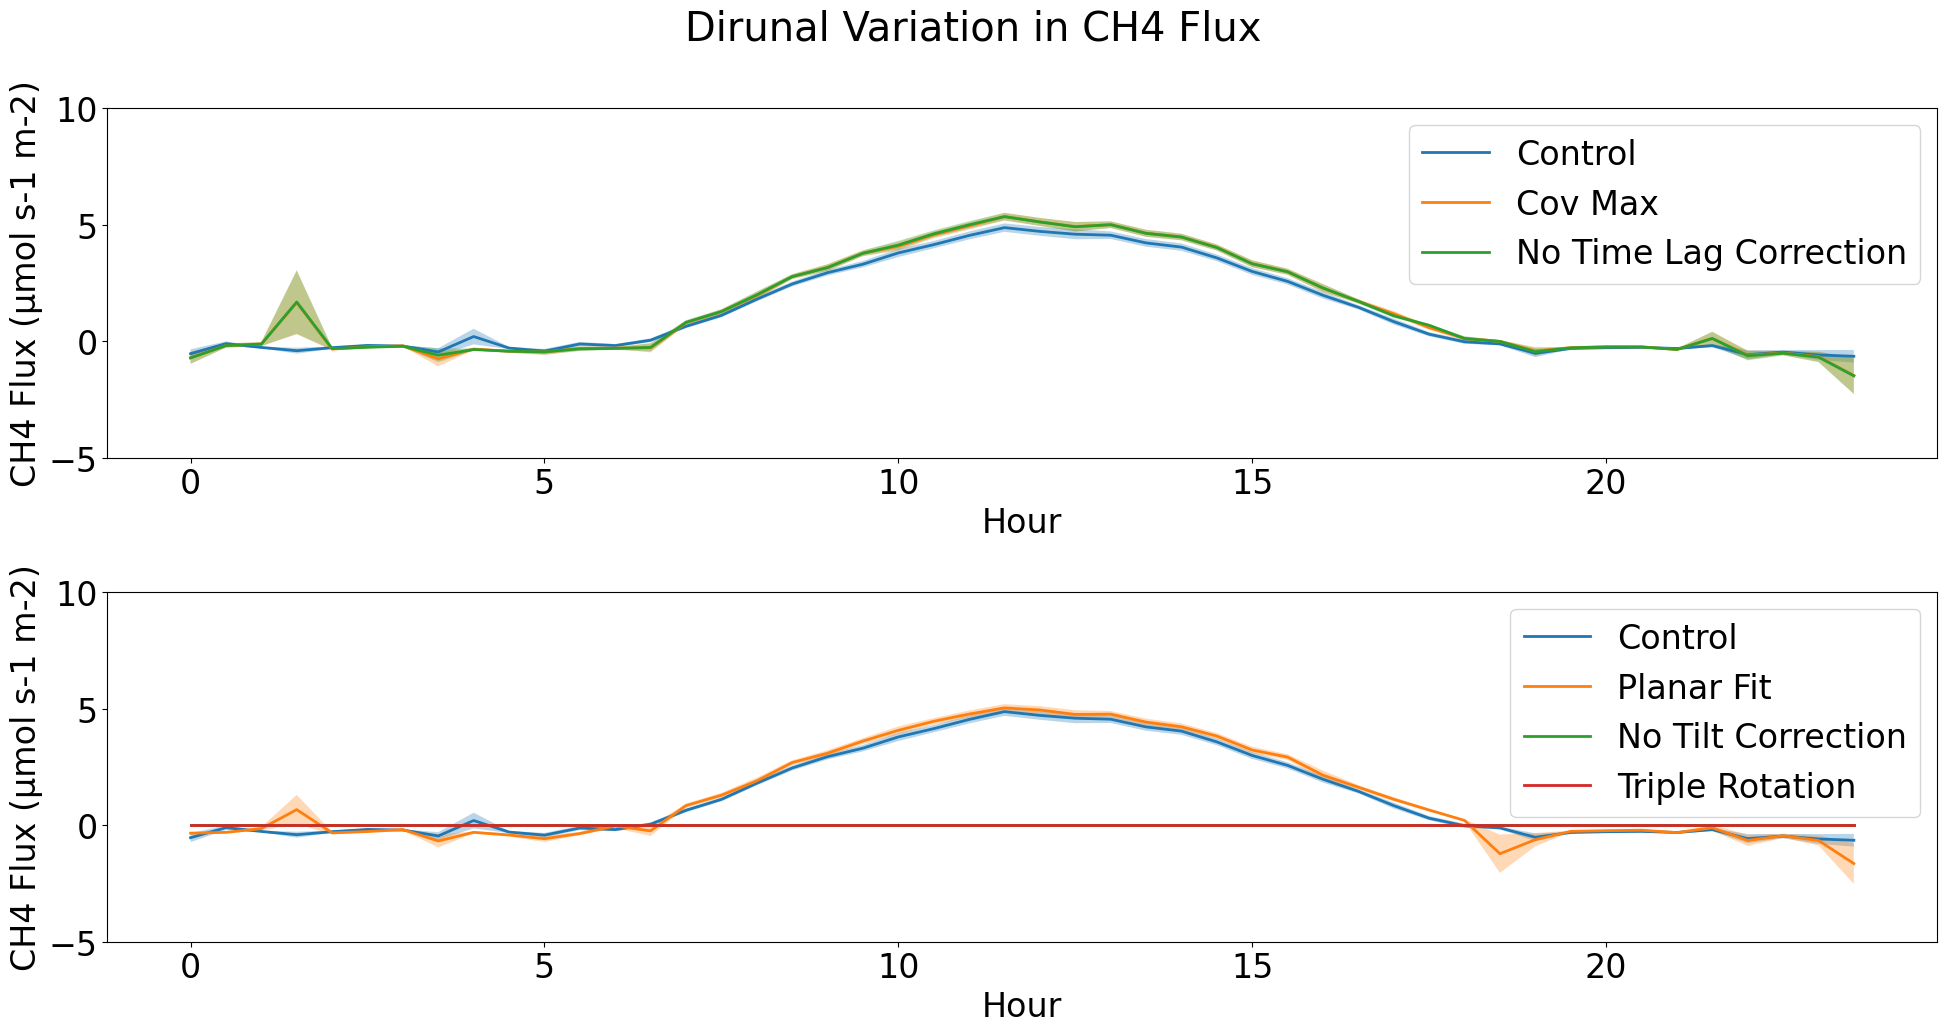

In [30]:
fig, axs = plot_diurnal('ch4_flux', lims=(-5, 10))
for ax in axs:
    ax.set_ylabel('CH4 Flux (µmol s-1 m-2)')

fig.suptitle('Dirunal Variation in CH4 Flux', y=1.05)

/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slic

Text(0.5, 1.05, 'Dirunal Variation in LE Flux')

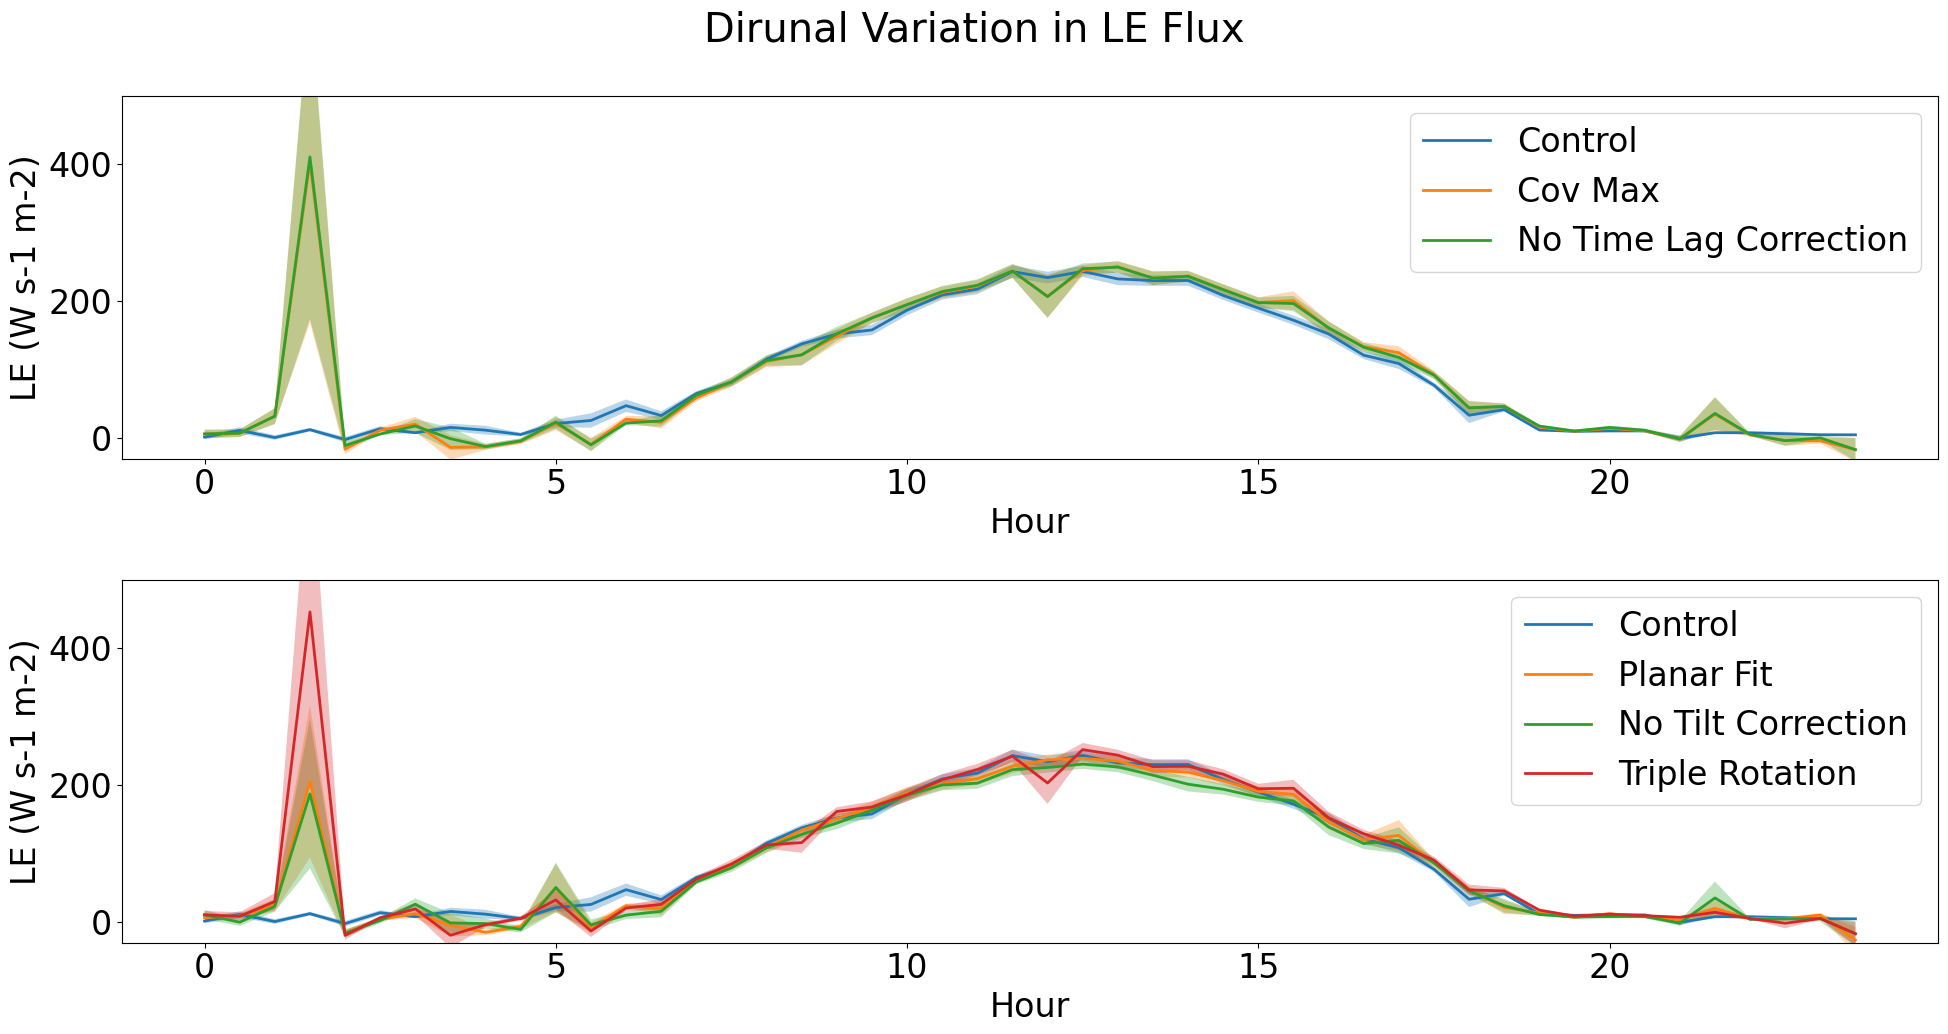

In [31]:
fig, axs = plot_diurnal('LE', lims=(-30, 500))
for ax in axs:
    ax.set_ylabel('LE (W s-1 m-2)')
fig.suptitle('Dirunal Variation in LE Flux', y=1.05)

/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/mambaforge/envs/python3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slic

Text(0.5, 1.05, 'Dirunal Variation in H Flux')

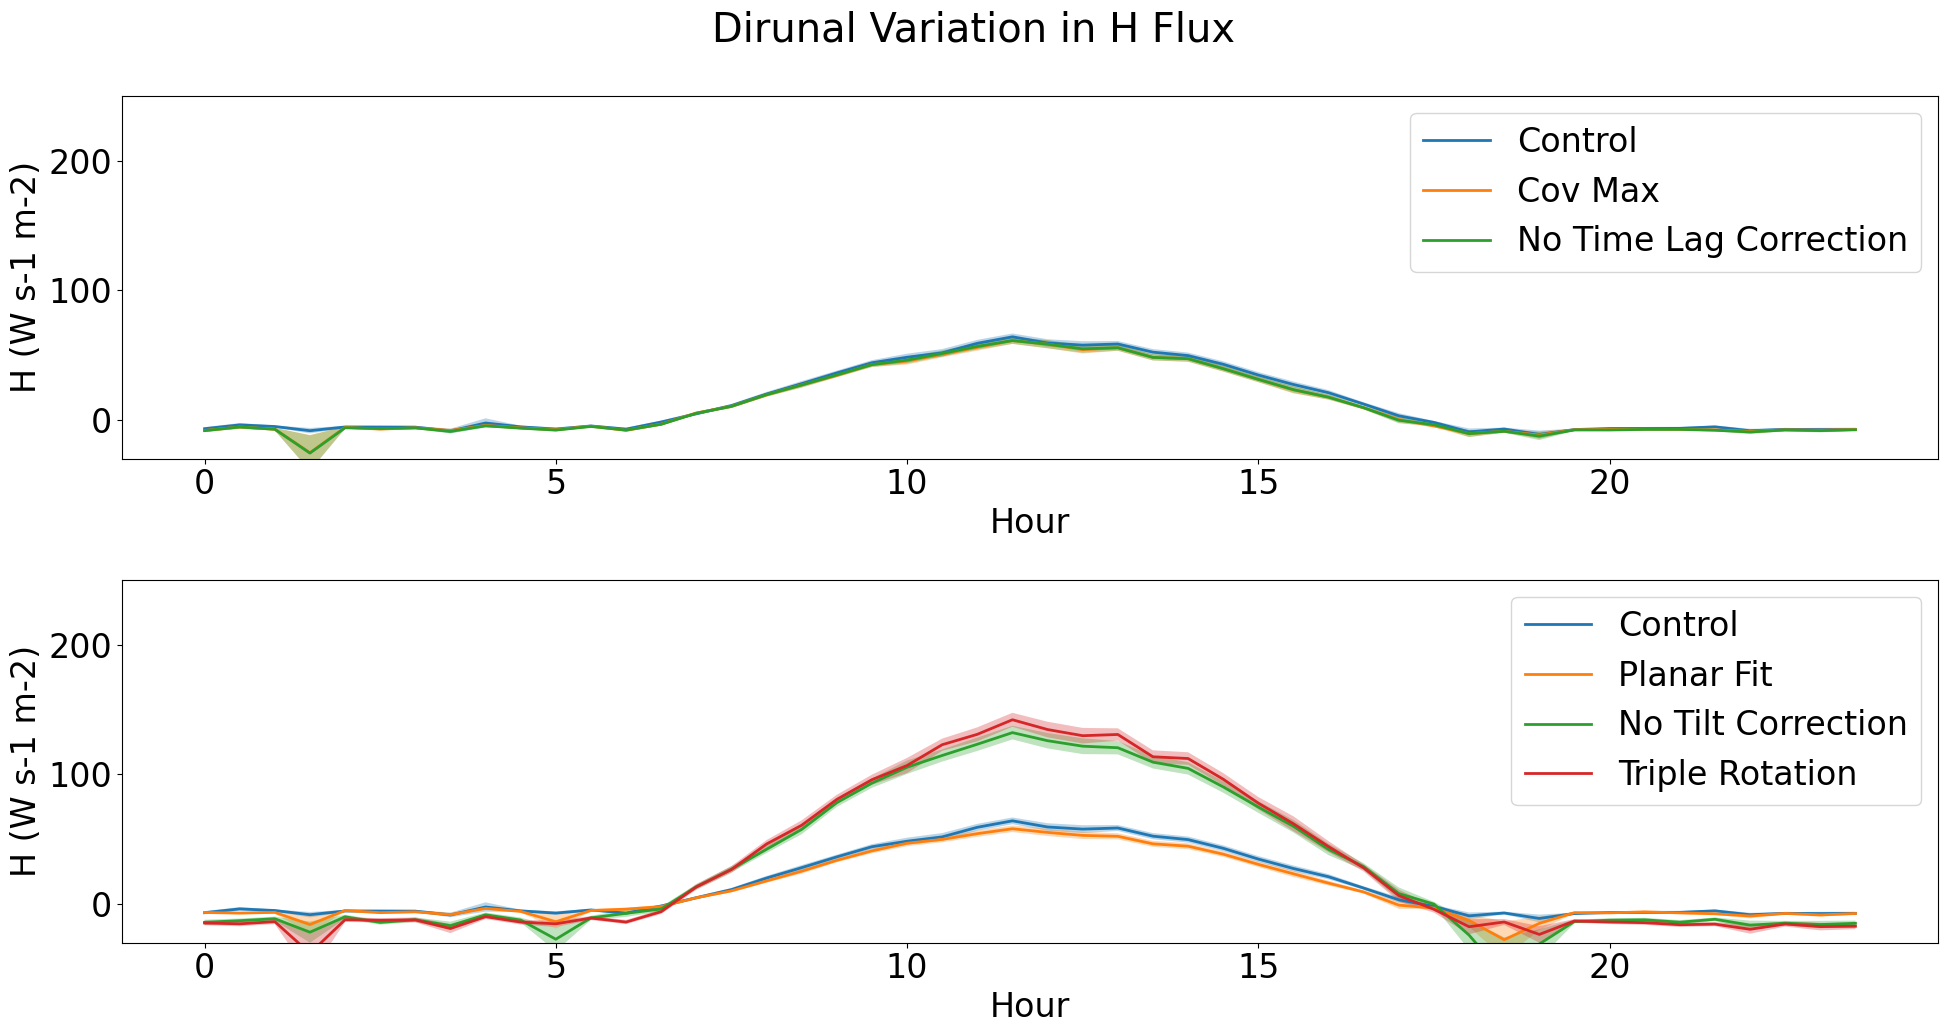

In [32]:
fig, axs = plot_diurnal('H', lims=(-30, 250))
for ax in axs:
    ax.set_ylabel('H (W s-1 m-2)')
fig.suptitle('Dirunal Variation in H Flux', y=1.05)

In [33]:
Rn

NameError: name 'Rn' is not defined

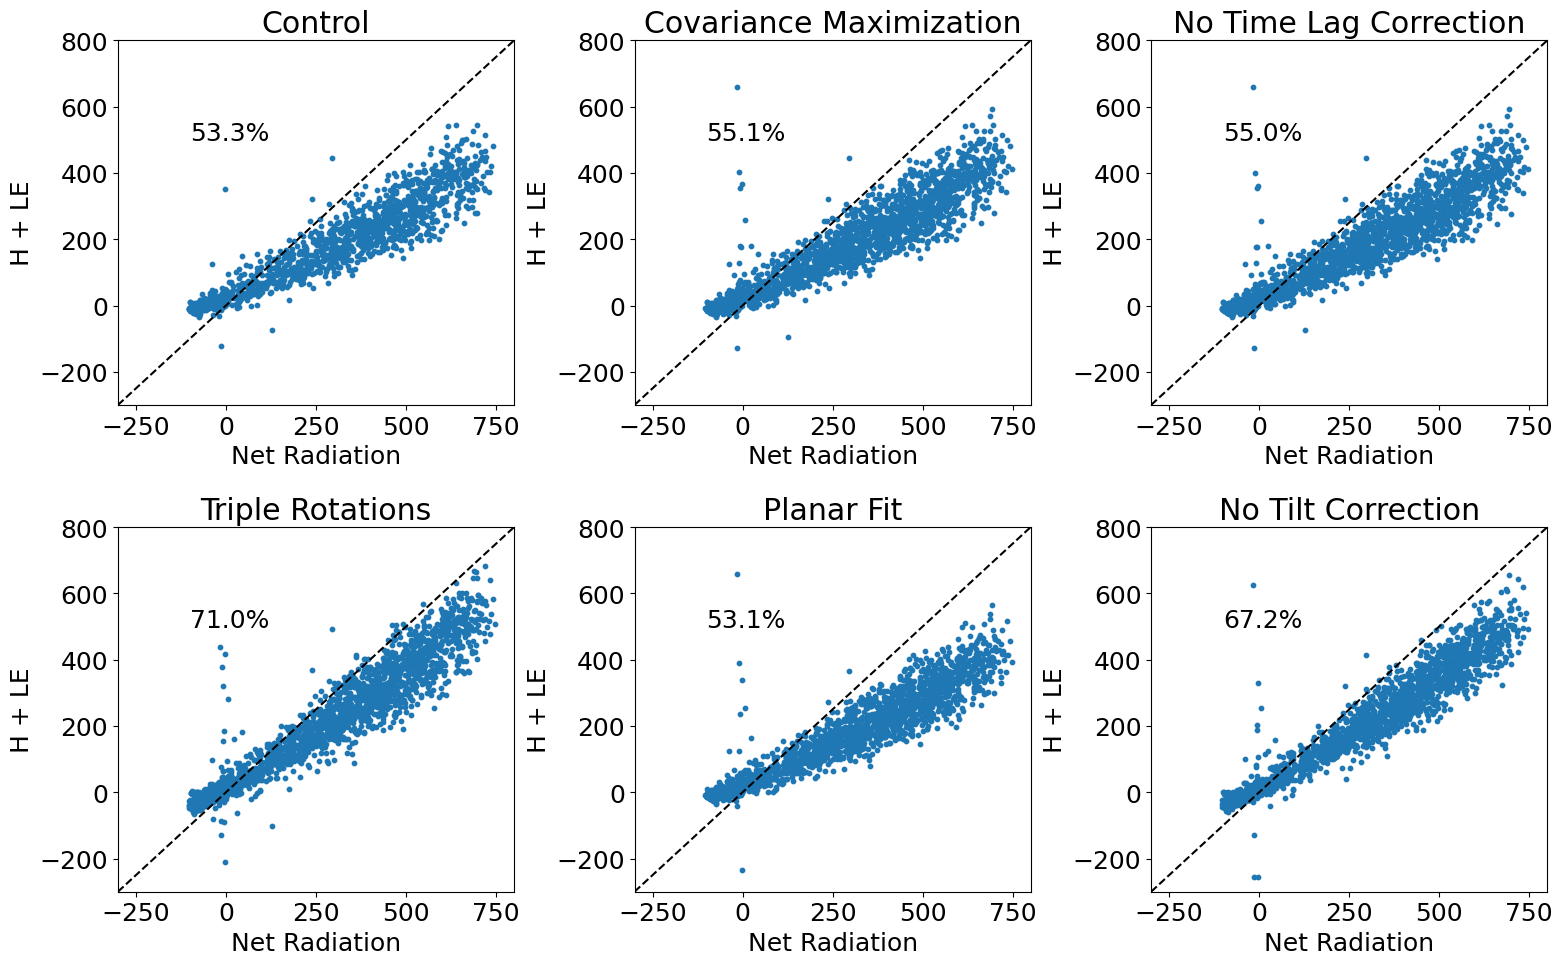

In [36]:
plt.rcParams['font.size'] = 18
def eb_plot(run_id, plot=True):
    filter = (output_xr.qc_H < 1) & (output_xr.qc_LE < 1)
    H = output_xr.H.where(filter).sel(run_id=run_id)
    LE = output_xr.LE.where(filter).sel(run_id=run_id)
    Rn = output_xr['SWin_1_1_1'] - output_xr['SWout_1_1_1'] + output_xr['LWin_1_1_1'] + output_xr['LWout_1_1_1']
    Rn = Rn.where(filter).sel(run_id=run_id)
    filter2 = (~np.isnan(Rn)) & (~np.isnan(H)) & (~np.isnan(LE))
    Rn = Rn.data[filter2]
    HLE = (H+LE)[filter2]
    
    closure = stats.linregress(Rn, HLE)
    if plot:
        plt.scatter(Rn, HLE, s=10)
        plt.text(-100, 500, f'{closure.slope*100:.1f}%')
    else:
        return closure

fig = plt.figure(figsize=(20, 10))

# control
fig.add_subplot(242)
eb_plot('Control')
plt.plot([-300, 1000], [-300, 1000], 'k--')
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('Control')


# cov max
fig.add_subplot(243)
filter = (output_xr.qc_H < 2) & (output_xr.qc_LE < 2)
eb_plot('Cov Max')
plt.plot([-300, 1000], [-300, 1000], 'k--')
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('Covariance Maximization')

# 0 time lag
fig.add_subplot(244)
eb_plot('No Time Lag Correction')
plt.plot([-300, 1000], [-300, 1000], 'k--', zorder=1000)
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('No Time Lag Correction')

# planar fit
fig.add_subplot(247)
eb_plot('Planar Fit')
plt.plot([-300, 1000], [-300, 1000], 'k--')
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('Planar Fit')

# no tilt corr
fig.add_subplot(248)
eb_plot('No Tilt Correction')
plt.plot([-300, 1000], [-300, 1000], 'k--')
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('No Tilt Correction')

fig.add_subplot(246)
eb_plot('Triple Rotation')
plt.plot([-300, 1000], [-300, 1000], 'k--')
plt.xlim(-300, 800)
plt.ylim(-300, 800)
plt.ylabel('H + LE')
plt.xlabel('Net Radiation')
plt.title('Triple Rotations')

plt.tight_layout(h_pad=1.1, w_pad=0.5)

# Cool plots!
* Fingerprint plots!
* More comparison plots

TypeError: can only lookup dictionaries from Dataset.loc

In [70]:
output_xr['co2_flux'].rolling(dict(date_time=6)).median()

<xarray.DataArray 'co2_flux' (date_time: 4511, run_id: 10)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * date_time  (date_time) datetime64[ns] 2020-06-20T18:30:00 ... 2020-09-22T...
  * run_id     (run_id) object 'Control' 'Cov Max' ... '_No Time Lag Correction'

Text(0.5, 1.05, 'August LE')

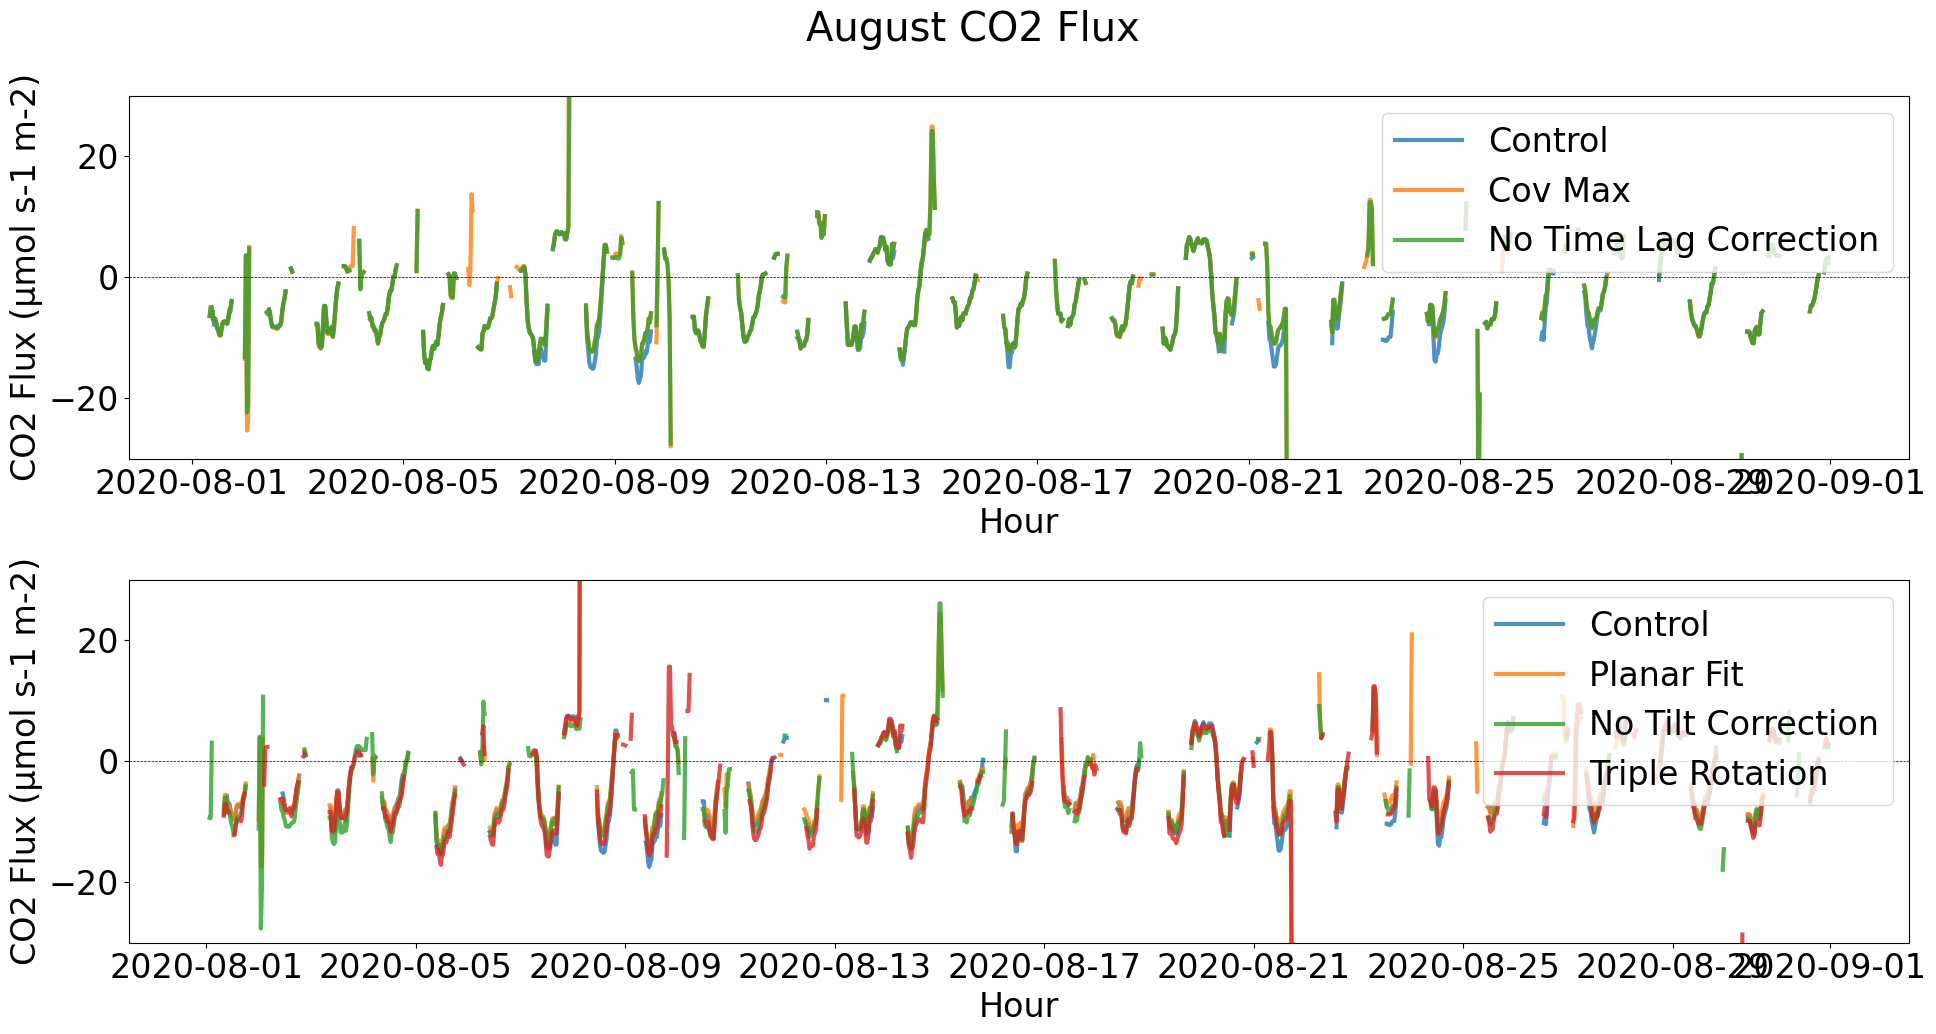

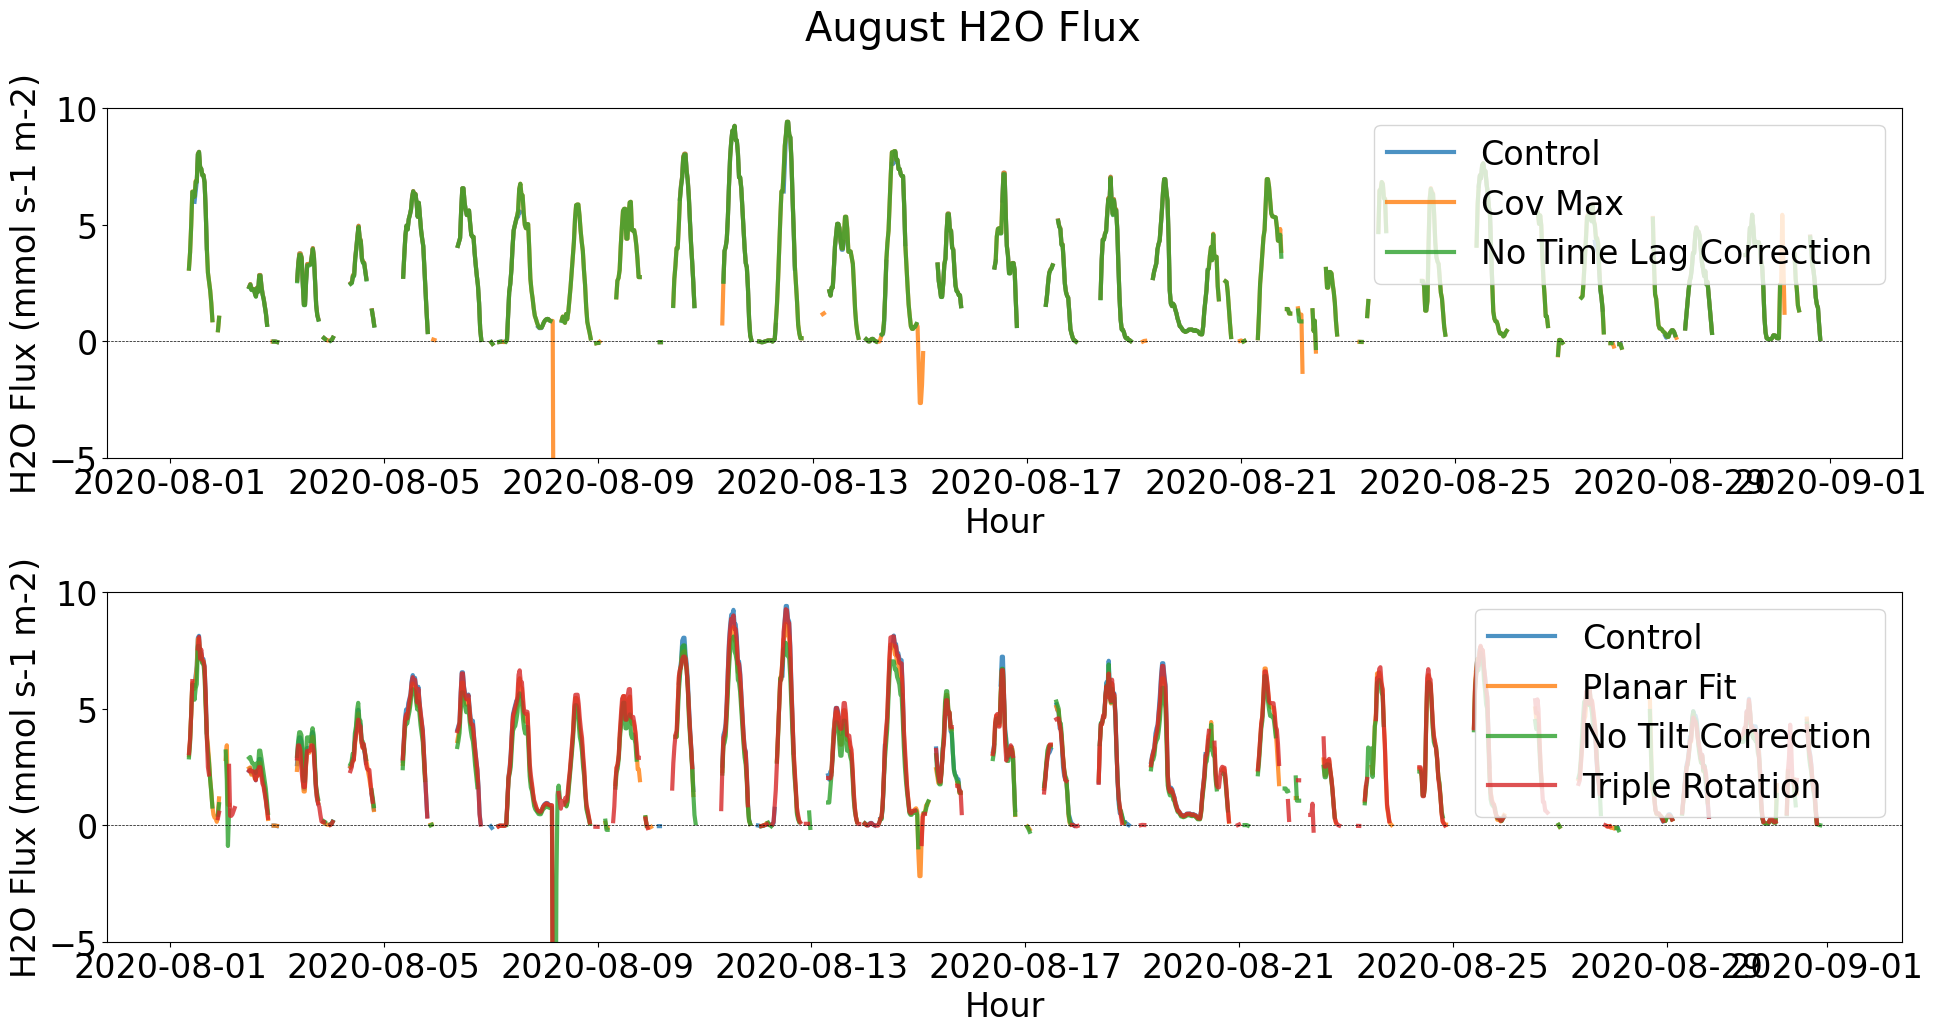

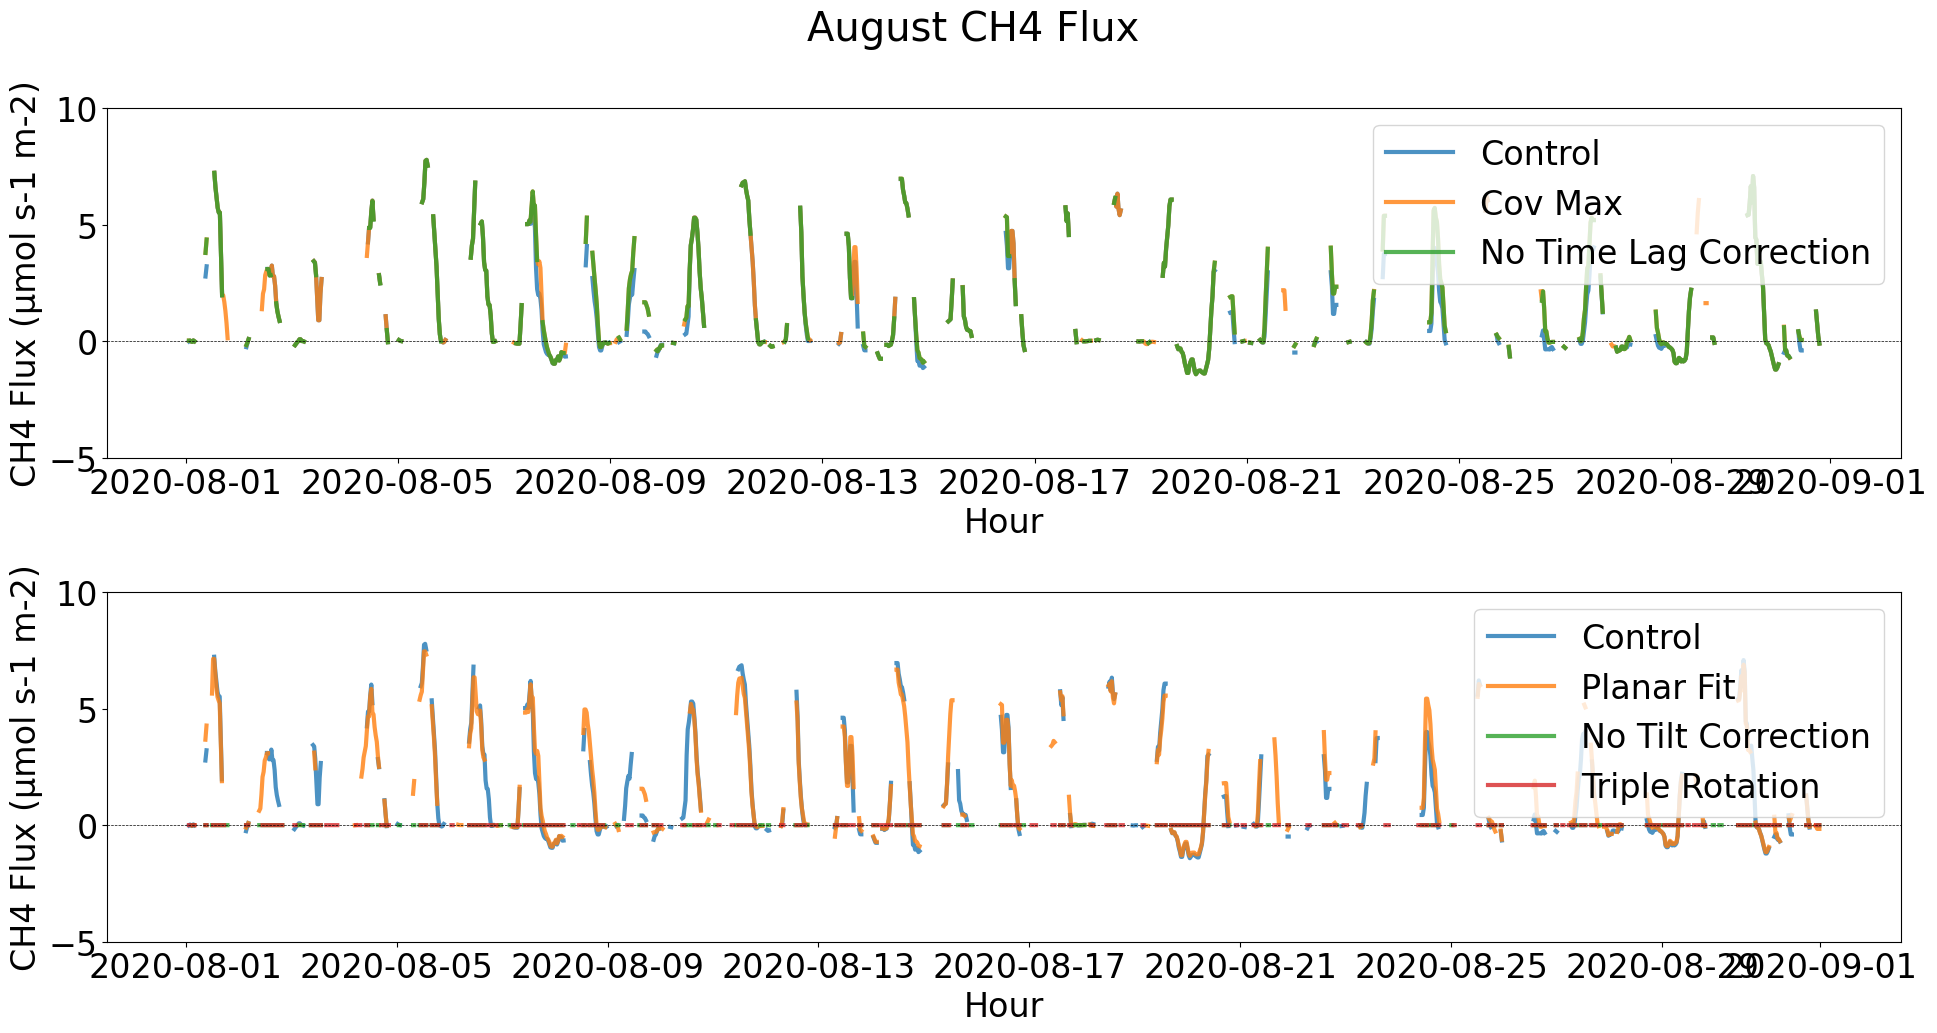

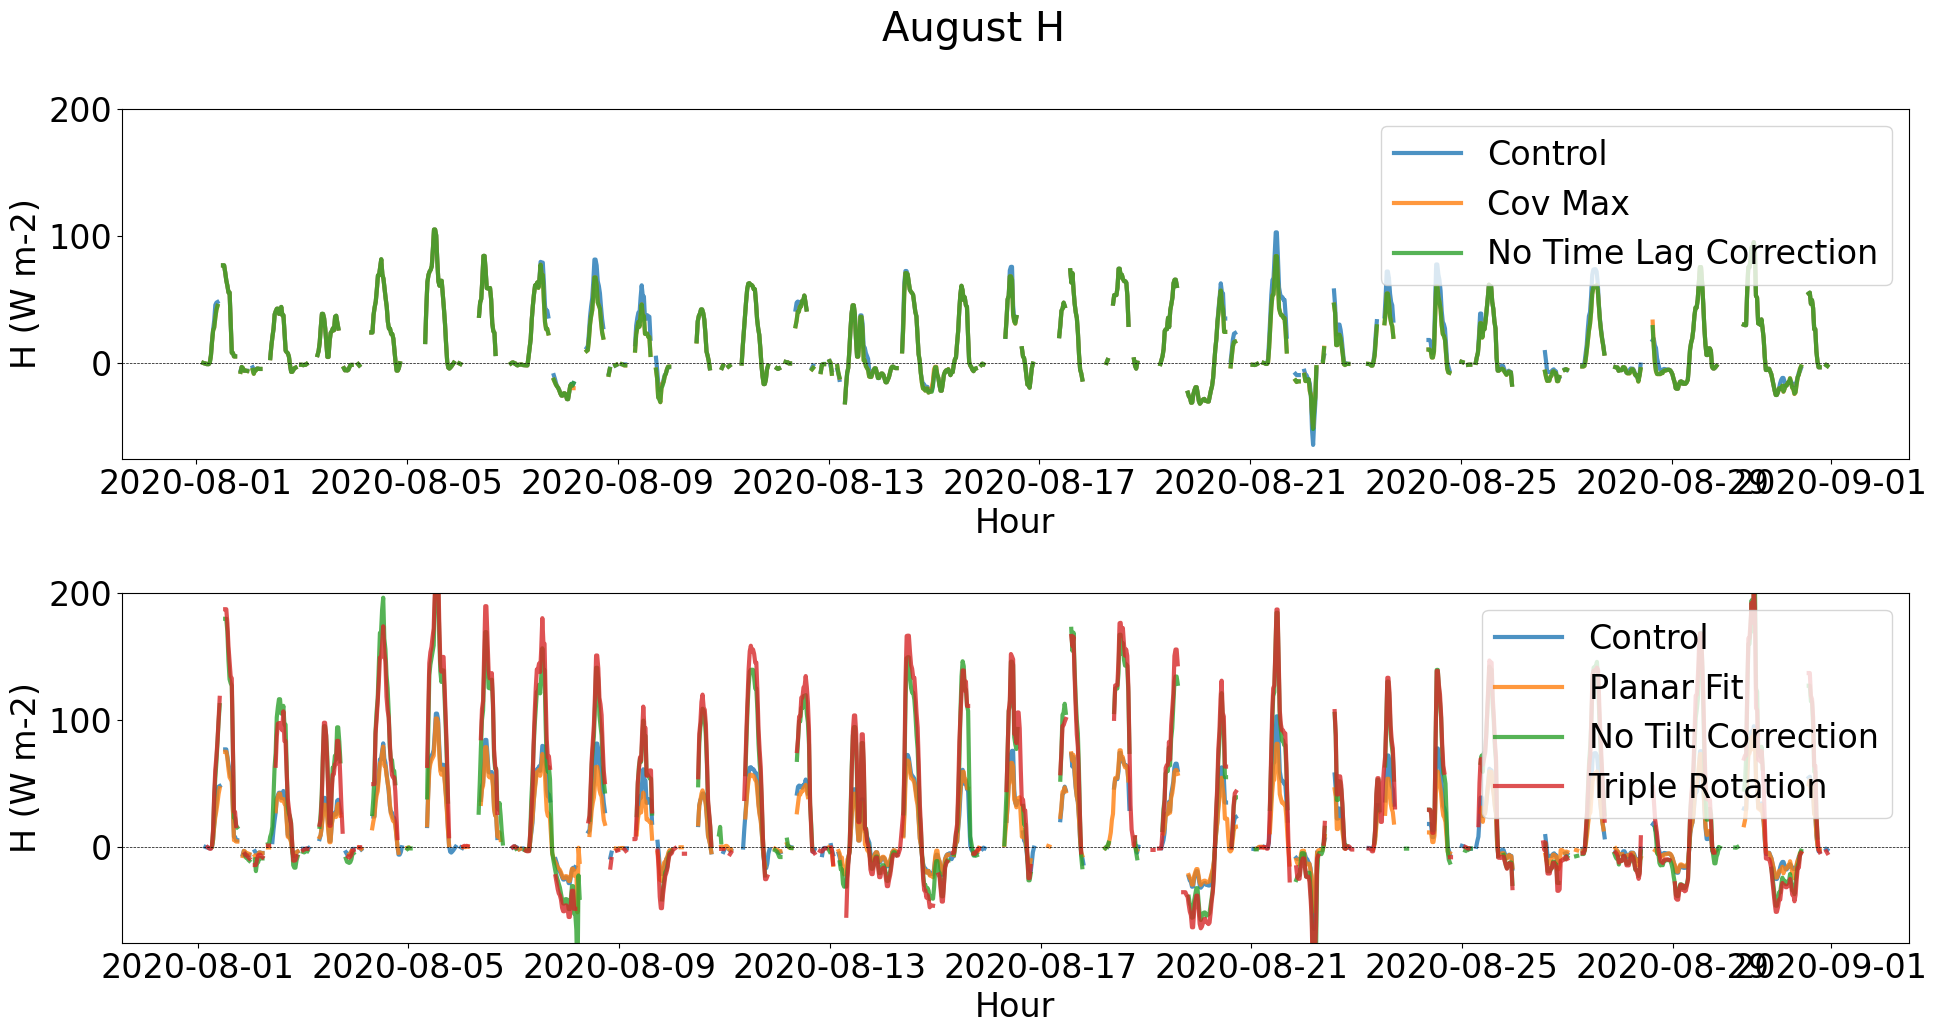

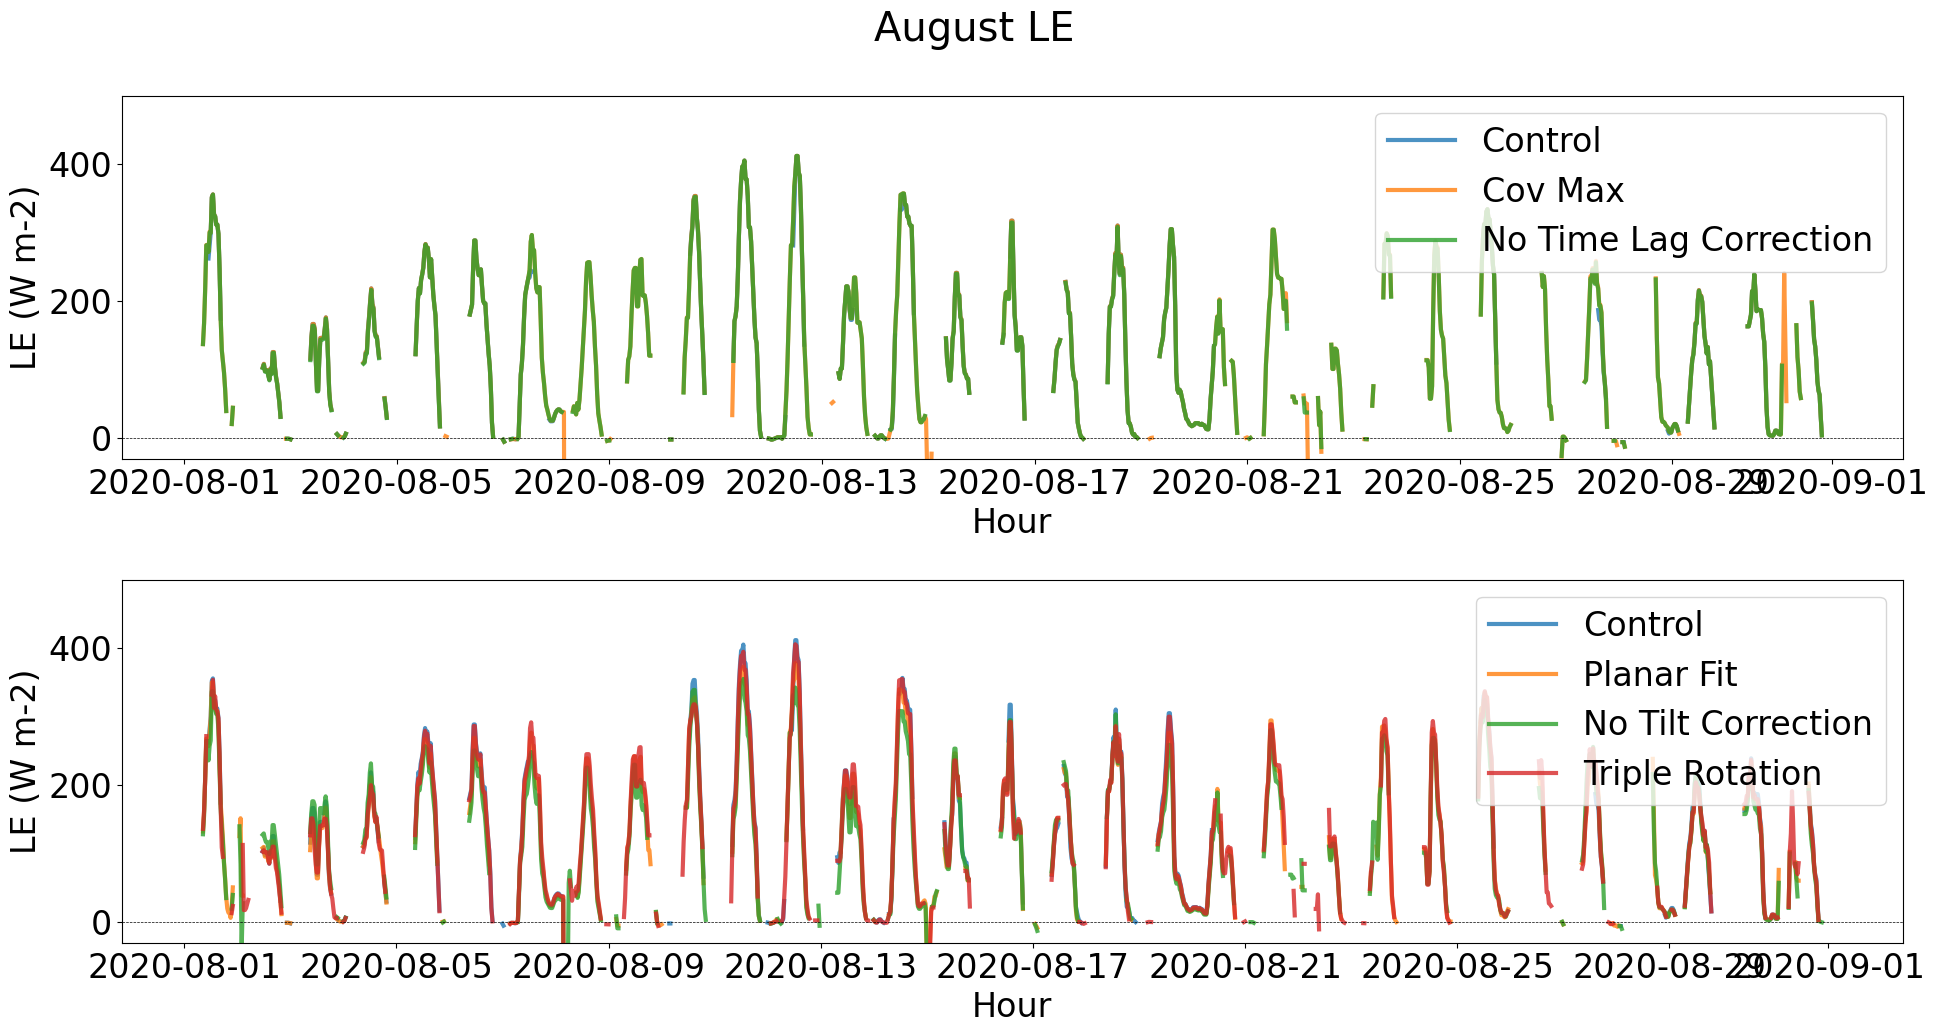

In [100]:
def plot_diurnal(output_xr_in, name, lims, qc):
    output_xr = output_xr_in.where(output_xr_in.date_time.dt.month == 8, drop=True)
    hh = output_xr.date_time.dt.hour + output_xr.date_time.dt.minute/60

    plt.rcParams['font.size'] = 24
    np.seterr(all="ignore")
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    mean = output_xr.sel(dict(run_id=['Control', 'Cov Max', 'No Time Lag Correction'])).where(output_xr[qc] < 2)[name].rolling(dict(date_time=4)).median()
    # err = output_xr.sel(dict(run_id=['Control', 'Cov Max', 'No Time Lag Correction'])).where(output_xr.qc_co2_flux != 2)[name]
    
    
    for run_id in mean.run_id:
        axs[0].plot(mean.date_time, mean.sel(run_id=run_id), label=run_id.values, lw=3, alpha=0.8)
        # axs[0].fill_between(mean.date_time, (mean - err).sel(run_id=run_id),( mean + err).sel(run_id=run_id), alpha=0.3)
    axs[0].set_ylim(*lims)    
    axs[0].set_ylabel(name)
    xlim = axs[0].get_xlim()
    axs[0].hlines(0, *xlim, color='k', linestyle='--', lw=0.5)
    axs[0].set_xlim(*xlim)
    axs[0].legend(loc='upper right')

    axs[0].set_xlabel('Hour')
    mean = output_xr.sel(dict(run_id=['Control', 'Planar Fit', 'No Tilt Correction', 'Triple Rotation'])).where(output_xr[qc] < 2)[name].rolling(dict(date_time=4)).median()
    # err = output_xr.sel(dict(run_id=['Control', 'Planar Fit', 'No Tilt Correction', 'Triple Rotation'])).where(output_xr.qc_co2_flux != 2)[name]
    for run_id in mean.run_id:
        axs[1].plot(mean.date_time, mean.sel(run_id=run_id), label=run_id.values, lw=3, alpha=0.8)
        # axs[1].fill_between(mean.date_time, (mean - err).sel(run_id=run_id),( mean + err).sel(run_id=run_id), alpha=0.3)
    xlim = axs[1].get_xlim()
    axs[1].hlines(0, *xlim, color='k', linestyle='--', lw=0.5)
    axs[1].set_xlim(*xlim)
    axs[1].set_xlabel('Hour')
    axs[1].set_ylim(*lims)
    axs[1].set_ylabel(name)
    axs[1].legend(loc='upper right')
    plt.tight_layout(h_pad=1.2)

    return fig, axs

fig, axs = plot_diurnal(output_xr, 'co2_flux', lims=(-30, 30), qc='qc_co2_flux')
for ax in axs:
    ax.set_ylabel('CO2 Flux (µmol s-1 m-2)')
fig.suptitle('August CO2 Flux', y=1.05)

fig, axs = plot_diurnal(output_xr, 'h2o_flux', lims=(-5, 10), qc='qc_h2o_flux')
for ax in axs:
    ax.set_ylabel('H2O Flux (mmol s-1 m-2)')
fig.suptitle('August H2O Flux', y=1.05)

fig, axs = plot_diurnal(output_xr, 'ch4_flux', lims=(-5, 10), qc='qc_ch4_flux')
for ax in axs:
    ax.set_ylabel('CH4 Flux (µmol s-1 m-2)')
fig.suptitle('August CH4 Flux', y=1.05)

fig, axs = plot_diurnal(output_xr, 'H', lims=(-75, 200), qc='qc_H')
for ax in axs:
    ax.set_ylabel('H (W m-2)')
fig.suptitle('August H', y=1.05)

fig, axs = plot_diurnal(output_xr, 'LE', lims=(-30, 500), qc='qc_LE')
for ax in axs:
    ax.set_ylabel('LE (W m-2)')
fig.suptitle('August LE', y=1.05)

